# Some examples using ggplot2

Mygraphics library has an easy API to build nice graphics. 
Functions usually requires a data.frame with four columns: x, variable, value, and colors. 
The variable is a required parameter for all examples. 

## Library
The library myGraphics.R has a function named loadlibrary that is responsible for checking installed packages. 
Once the package is installed, it is loaded.
Take some time looking the parameters of functions available at https://raw.githubusercontent.com/eogasawara/mylibrary/master/myGraphics.R. They can be helpful in setting up your graphics. 

In [5]:
source("https://raw.githubusercontent.com/eogasawara/mylibrary/master/myGraphics.R")
loadlibrary("reshape")
loadlibrary("RColorBrewer")
loadlibrary("gridExtra")
loadlibrary("dplyr")

Loading required package: ggplot2
Loading required package: scales
Loading required package: reshape
Warning message:
"package 'reshape' was built under R version 3.5.2"Loading required package: RColorBrewer
Loading required package: gridExtra
Warning message:
"package 'gridExtra' was built under R version 3.5.2"Loading required package: dplyr

Attaching package: 'dplyr'

The following object is masked from 'package:gridExtra':

    combine

The following object is masked from 'package:reshape':

    rename

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



## Color pallete

Color brewer is a nice toll to setup color for your graphics. 

In [6]:
col_set <- brewer.pal(11, 'Spectral')
col_2 <- col_set[c(4,9)]
col_3 <- col_set[c(4,9,11)]
col_4 <- col_set[c(3,5,7,9)]   
col_5 <- col_set[c(3,5,7,9,11)]    
options(repr.plot.width=4, repr.plot.height=3) 

## Datasets for the examples

This function creates the basic dataset used in the examples

In [7]:
create_dataset <- function() {
  data <- read.table(text = "Year Months Flights Delays
                     2016 Jan-Mar 11 6
                     2016 Apr-Jun 12 5
                     2016 Jul-Sep 13 4
                     2016 Oct-Dec 12 5
                     2017 Jan-Mar 10 4
                     2017 Apr-Jun 9 3
                     2017 Jul-Sep 11 4
                     2017 Oct-Dec 20 5
                     2018 Jan-Mar 15 3
                     2018 Apr-Jun 12 5
                     2018 Jul-Sep 13 4
                     2018 Oct-Dec 8 4",
                     header = TRUE,sep = "")  
  data$OnTime <- data$Flights - data$Delays 
  data$Perc <- data$Delays / data$Flights
  return(data)
}

data <- create_dataset()
head(data)

Year,Months,Flights,Delays,OnTime,Perc
2016,Jan-Mar,11,6,5,0.5454545
2016,Apr-Jun,12,5,7,0.4166667
2016,Jul-Sep,13,4,9,0.3076923
2016,Oct-Dec,12,5,7,0.4166667
2017,Jan-Mar,10,4,6,0.4000000
2017,Apr-Jun,9,3,6,0.3333333


Data adjustment for ggplot usage.  

In [4]:
adjust_dataset <- function(data) {
  data <- melt(data[,c('Year', 'Months', 'Flights', 'Delays', 'OnTime', 'Perc')], id.vars = c(1,2))
  data$x <- sprintf("%d-%s", data$Year, data$Months)
  data$x <- factor(data$x,levels = data$x[1:12])
  return(data)
}
data <- adjust_dataset(data)
head(data)

ERROR: Error in melt(data[, c("Year", "Months", "Flights", "Delays", "OnTime", : não foi possível encontrar a função "melt"


## Datasets for the examples

This function presents some techniques for creating and merging datasets for ggplot usage.  

## Scatter plot

This example filters on flights and delays. It uses two colors and setup x and y labels. 
The function returns a preset graphics that can be enhanced. In this case, we change the x labels orientations and add a centered title.

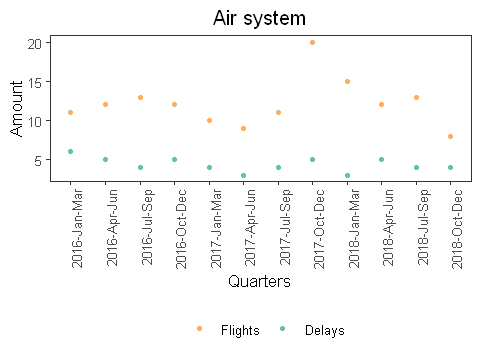

In [55]:
grfs <- plot.scatter(data %>% filter(variable %in% c('Flights', 'Delays')), colors=col_2, label_x = "Quarters", label_y = "Amount") 
grfs <- grfs + theme(axis.text.x = element_text(angle=90, hjust=1))
grfs <- grfs + ggtitle("Air system") + theme(plot.title = element_text(hjust = 0.5))
plot(grfs)

## Line plot
This line plot uses the default configuration and extends the x labels orientation. 
It is very important to try to present a particular color for a specific data. In this case, delays and flights are presented in the same color as previous graphic. 


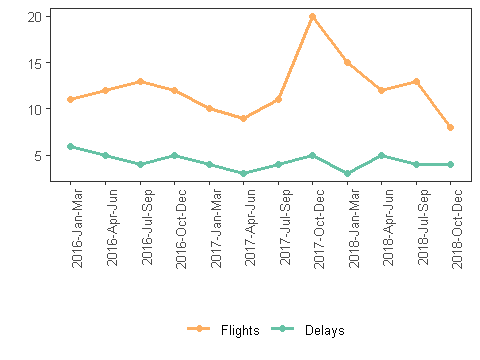

In [57]:
grfs <- plot.series(data %>% filter(variable %in% c('Flights', 'Delays')),colors=col_2) 
grfs <- grfs + theme(axis.text.x = element_text(angle=90, hjust=1))
plot(grfs)

## bar graph
This graphic presents a bar plot for the first 11 quarters. Each quarter is presented in a specific color. 

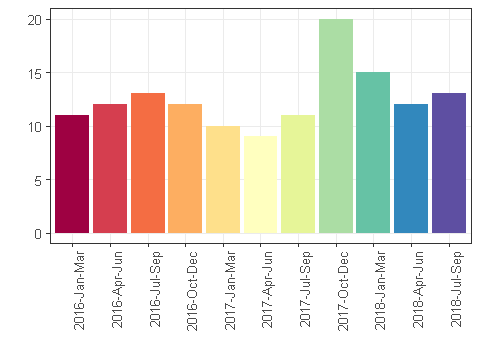

In [59]:
grf <- plot.bar(data[1:11,] %>% filter(variable=='Flights') %>% select(variable=x, value=value), colors=col_set)
grf <- grf + theme(axis.text.x = element_text(angle=90, hjust=1))
plot(grf)

## grouped bar & stacked-bar

Grouped bar or stacked bars can present different perspectives for the same data.

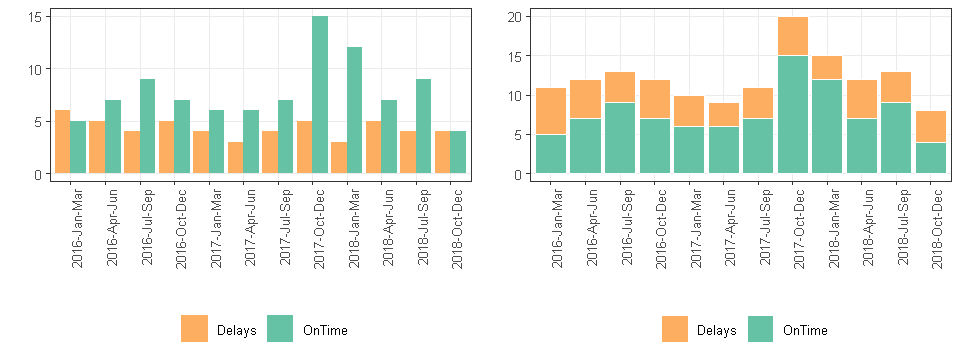

In [61]:
grfb <- plot.bar(data %>% filter(variable %in% c('OnTime', 'Delays')), colors=col_2, group=TRUE)
grfb <- grfb + theme(axis.text.x = element_text(angle=90, hjust=1))
grfsb <- plot.stackedbar(data %>% filter(variable %in% c('OnTime', 'Delays')), colors=col_2) 
grfsb <- grfsb + theme(axis.text.x = element_text(angle=90, hjust=1))

options(repr.plot.width=8, repr.plot.height=3)
grid.arrange(grfb, grfsb, ncol=2)
options(repr.plot.width=4, repr.plot.height=3)

## Faced grouped bar

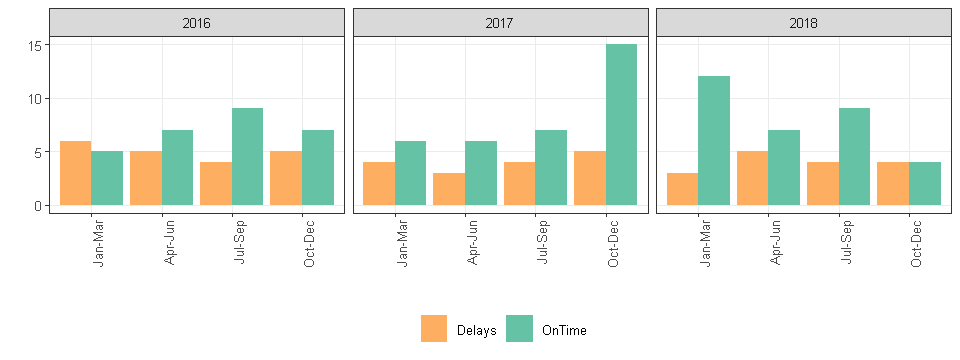

In [64]:
grf <- plot.bar(data %>% filter(variable %in% c('OnTime', 'Delays')) %>% 
                select(x=Months, face=Year, variable=variable, value=value), group=TRUE, colors=col_2)
grf <- grf + theme(axis.text.x = element_text(angle=90, hjust=1))
grf <- grf + xlab("")
grf <- grf + guides(fill=guide_legend(title=""))
grf <- grf + ylab("")
grf <- grf + facet_wrap(~face, ncol = 3) 

options(repr.plot.width=8, repr.plot.height=3)
plot(grf)
options(repr.plot.width=4, repr.plot.height=3)

## pie chart

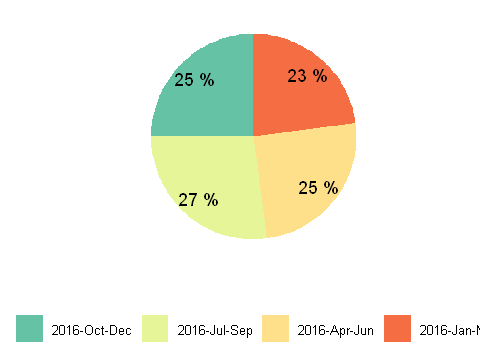

In [66]:
mypiedata <- data %>% filter(Year == 2016 & variable =="Flights") %>% select(variable=x, value=value)
mypiedata$colors <- col_4
mypiedata <- prepare.pieplot(mypiedata)

grfpie <- plot.pieplot(mypiedata, colors=as.character(mypiedata$colors))
plot(grfpie)

## lollipop plot

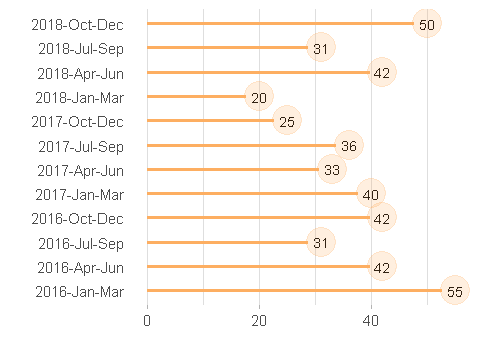

In [67]:
lolli <- merge(x = data %>% filter(variable =="Delays") %>% select(variable=x, delays=value), 
                y = data %>% filter(variable =="Flights") %>% select(variable=x, flights=value), 
                by.x="variable", by.y="variable") 
lolli$value <- round(100 * lolli$delays / lolli$flights)

grf <- plot_lollipop(lolli, col_2[1], max_value_gap=2.25)
plot(grf)

## density plot

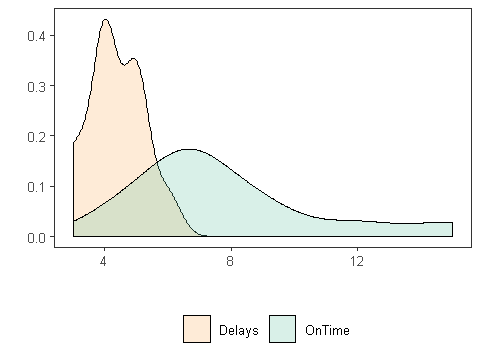

In [74]:
grfgd <- plot.density(data %>% filter(variable %in% c('OnTime', 'Delays')), label_series = "", colors=col_2)
plot(grfgd)

## Histogram

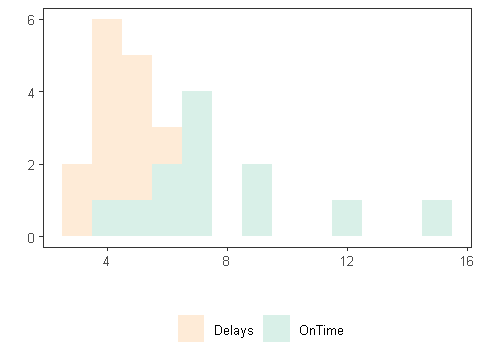

In [77]:
grfgd <- plot.hist(data %>% filter(variable %in% c('OnTime', 'Delays')), label_series = "", colors=col_2, bin=1)
plot(grfgd)

## Box-plot

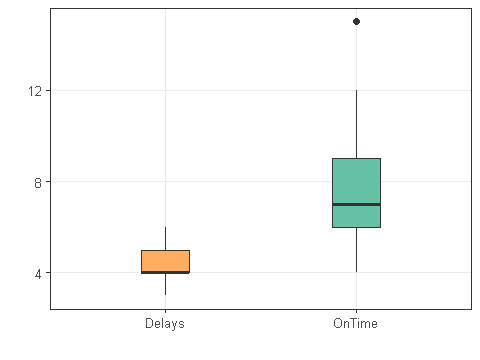

In [75]:
grfb <- plot.boxplot(data %>% filter(variable %in% c('OnTime', 'Delays')), colors=col_2)
plot(grfb)

## Building PDF from graphics

In [13]:
pdf("examples/plot.pdf", width=4, height=3)
plot(grfb)
dev.off()

png 
  2